# Text Analytics

In [48]:
tweets = read.csv("tweets.csv", stringsAsFactors = FALSE)

In [49]:
head(tweets)

,Tweet,Avg
1,"I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore",2
2,iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple,2
3,LOVE U @APPLE,1.8
4,"Thank you @apple, loving my new iPhone 5S!!!!! #apple #iphone5S pic.twitter.com/XmHJCU4pcb",1.8
5,.@apple has the best customer service. In and out with a new phone in under 10min!,1.8
6,@apple ear pods are AMAZING! Best sound from in-ear headphones I've ever had!,1.8


In [50]:
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [51]:
tweets$Negative = as.factor(tweets$Avg <= -1)

In [52]:
table(tweets$Negative)


FALSE  TRUE 
  999   182 

In [53]:
# #Install Packages
# #install.packages("tm")
library(tm)
# #install.packages("SnowballC")
library(SnowballC)

In [54]:
# #Create a CORPUS
corpus = Corpus(VectorSource(tweets$Tweet))

In [55]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1181

In [56]:
strwrap(corpus[[1]])

[1] "I have to say, Apple has by far the best customer care service I have"
[2] "ever received! @Apple @AppStore"

In [57]:
# #Lowercase
corpus = tm_map(corpus, tolower)

In [58]:
strwrap(corpus[[1]])

[1] "i have to say, apple has by far the best customer care service i have"
[2] "ever received! @apple @appstore"

In [59]:
corpus = tm_map(corpus, PlainTextDocument)

In [60]:
strwrap(corpus[[1]])

[1] "i have to say, apple has by far the best customer care service i have"
[2] "ever received! @apple @appstore"

In [61]:
# #Remove Punctuation
corpus = tm_map(corpus, removePunctuation)

In [62]:
strwrap(corpus[[1]])

[1] "i have to say apple has by far the best customer care service i have"
[2] "ever received apple appstore"

In [63]:
# #Remove Stopwords as well as "apple"
corpus = tm_map(corpus, removeWords, c("apple", stopwords("english")))

In [64]:
corpus[[1]]

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 67

In [65]:
# #Stemming
corpus = tm_map(corpus, stemDocument)

In [66]:
strwrap(corpus[[1]])

[1] "say far best custom care servic ever receiv appstor"

In [67]:
stopwords("english")[1:10]

[1] "i"         "me"        "my"        "myself"    "we"        "our"      
 [7] "ours"      "ourselves" "you"       "your"

In [68]:
frequencies = DocumentTermMatrix(corpus)

In [69]:
frequencies

<<DocumentTermMatrix (documents: 1181, terms: 3289)>>
Non-/sparse entries: 8980/3875329
Sparsity           : 100%
Maximal term length: 115
Weighting          : term frequency (tf)

In [70]:
inspect(frequencies[1000:1005,505:515])

<<DocumentTermMatrix (documents: 6, terms: 11)>>
Non-/sparse entries: 1/65
Sparsity           : 98%
Maximal term length: 9
Weighting          : term frequency (tf)

              Terms
Docs           cheapen cheaper check cheep cheer cheerio cherylcol chief
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     0       0         0     0
  character(0)       0       0     0     0     1       0         0     0
              Terms
Docs           chiiiiqu child children
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0
  character(0)        0     0        0


In [71]:
findFreqTerms(frequencies, lowfreq=20)

[1] "android"              "anyon"                "app"                 
 [4] "appl"                 "back"                 "batteri"             
 [7] "better"               "buy"                  "can"                 
[10] "cant"                 "come"                 "dont"                
[13] "fingerprint"          "freak"                "get"                 
[16] "googl"                "ios7"                 "ipad"                
[19] "iphon"                "iphone5"              "iphone5c"            
[22] "ipod"                 "ipodplayerpromo"      "itun"                
[25] "just"                 "like"                 "lol"                 
[28] "look"                 "love"                 "make"                
[31] "market"               "microsoft"            "need"                
[34] "new"                  "now"                  "one"                 
[37] "phone"                "pleas"                "promo"               
[40] "promoipodplayerpromo" "realli"               "releas"              
[43] "samsung"              "say"                  "store"               
[46] "thank"                "think"                "time"                
[49] "twitter"              "updat"                "use"                 
[52] "via"                  "want"                 "well"                
[55] "will"                 "work"

In [72]:
findFreqTerms(frequencies, lowfreq=100)

[1] "iphon" "itun"  "new"

In [73]:
library("rpart")

Warning message:
: package 'rpart' was built under R version 3.2.5

In [74]:
library("rpart.plot")

Warning message:
: package 'rpart.plot' was built under R version 3.2.5

In [79]:
sparse = removeSparseTerms(frequencies, 0.995)

In [80]:
tweetsSparse = as.data.frame(as.matrix(sparse))

In [81]:
tweetsSparse = as.data.frame(as.matrix(sparse))

In [82]:
colnames(tweetsSparse) = make.names(colnames(tweetsSparse))

In [83]:
tweetsSparse$Negative = tweets$Negative

In [84]:
library(caTools)

set.seed(123)

Warning message:
: package 'caTools' was built under R version 3.2.5

In [85]:
split = sample.split(tweetsSparse$Negative, SplitRatio = 0.7)

In [86]:
trainSparse = subset(tweetsSparse, split==TRUE)
testSparse = subset(tweetsSparse, split==FALSE)

In [87]:
tweetCART = rpart(Negative ~ ., data=trainSparse, method="class")

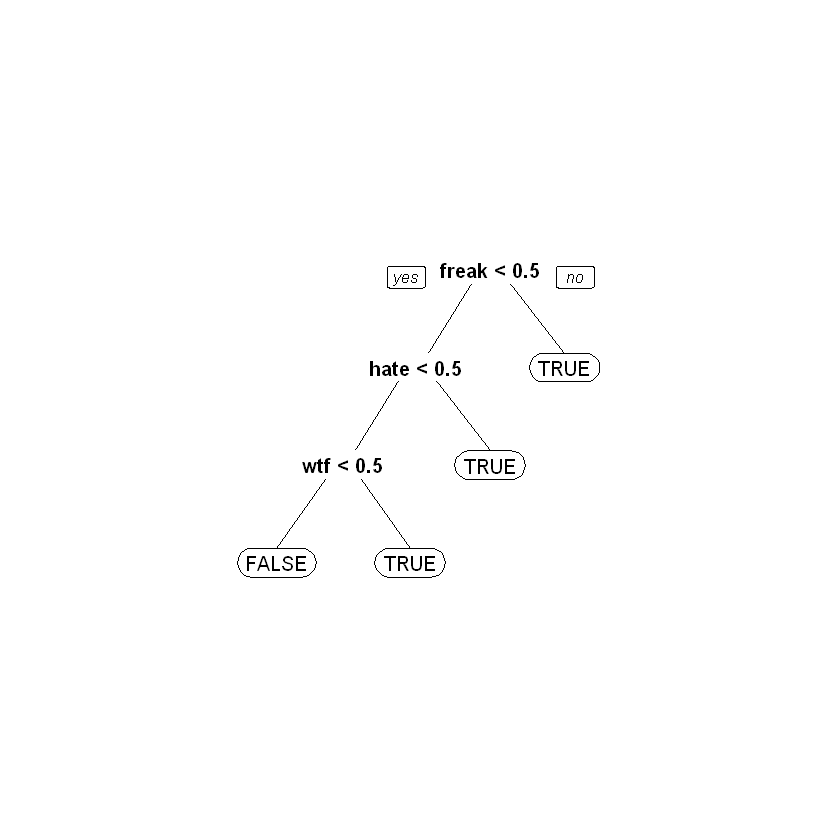

In [88]:
prp(tweetCART)

In [89]:
# #PERFORMANCE
predictCART = predict(tweetCART, newdata=testSparse, type="class")

In [90]:
table(testSparse$Negative, predictCART)

       predictCART
        FALSE TRUE
  FALSE   294    6
  TRUE     37   18

In [91]:
(294+18)/(294+6+37+18)

[1] 0.8788732

In [92]:
table(testSparse$Negative)


FALSE  TRUE 
  300    55 

In [93]:
330/355

[1] 0.9295775

In [94]:
# #RANDOM FOREST
library(randomForest)
set.seed(123)

Warning message:
: package 'randomForest' was built under R version 3.2.5randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [98]:
# #Time Taken is very very long
tweetRF = randomForest(Negative ~ ., data=trainSparse)

In [99]:
predictRF = predict(tweetRF, newdata=testSparse)

In [100]:
table(testSparse$Negative, predictRF)

       predictRF
        FALSE TRUE
  FALSE   292    8
  TRUE     32   23

In [101]:
(292+23)/(292+32+8+23)

[1] 0.8873239

In [110]:
# #Logistic Regression
tweetLog <- glm(Negative ~., data = trainSparse, family="binomial")

Warning message:
: glm.fit: algorithm did not convergeWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

In [111]:
summary(tweetLog)


Call:
glm(formula = Negative ~ ., family = "binomial", data = trainSparse)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients: (7 not defined because of singularities)
                       Estimate Std. Error    z value Pr(>|z|)    
(Intercept)          -9.920e+14  5.330e+06 -186121946   <2e-16 ***
X244tsuyoponzu       -3.512e+15  3.048e+07 -115204706   <2e-16 ***
X7evenstarz           3.320e+15  4.542e+07   73106681   <2e-16 ***
actual               -6.510e+14  2.884e+07  -22576632   <2e-16 ***
add                  -2.485e+14  6.062e+07   -4098491   <2e-16 ***
alreadi              -4.332e+14  3.772e+07  -11484882   <2e-16 ***
alway                -2.046e+15  4.813e+07  -42509986   <2e-16 ***
amaz                 -9.769e+14  3.977e+07  -24563922   <2e-16 ***
amazon               -4.872e+15  9.950e+07  -48965124   <2e-16 ***
android               3.365e+14  2.007e+07   16760975   <2e-16 ***
announc              -1.801

In [112]:
predictions <- predict(tweetLog, newdata = testSparse, type = "response")

Warning message:
In predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == : prediction from a rank-deficient fit may be misleading

In [113]:
table(testSparse$Negative, predictions >= 0.5)

       
        FALSE TRUE
  FALSE   253   47
  TRUE     22   33

In [115]:
(253+33)/(253+33+47+22)

[1] 0.8056338